# Data Cleaning Process
1. Missing, Incorrect, Inconsistent, and Duplicate Values
2. Data Conversion/Transformation
3. Noise and Outliers
4. Harmonization/Feature Generation

In [670]:
import pandas as pd
import numpy as np
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt

## Bring the data in using pandas

In [671]:
filename = "unclean_cleanornot_APIandKaggle.csv"

mergedDF = pd.read_csv(filename)

print(mergedDF)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## DROP COLUMNS

In [672]:
# drop all column with "Image" in the title
mergedDF = mergedDF.drop(columns=[col for col in mergedDF.columns if 'Image' in col])

print(mergedDF)
print(mergedDF.columns)

     product_id                                       product_name  brand_id  \
0       P503741                                  Lip Treatment Oil      7103   
1       P503754                  Skin-Enhancing Tinted Moisturizer      7103   
2       P503762   Lash-Amplifying Volumizing & Lengthening Mascara      7103   
3       P503732           Skin Melt Talc-Free Loose Setting Powder      7103   
4       P503763                    Light-Catching Highlighter Balm      7103   
5       P503767                           Skin-Enhancing Concealer      7103   
6       P503759               Ultra-Flex Clear Eyebrow Shaping Gel      7103   
7       P504779           Desert Date Cream Blush & Lip Multistick      7103   
8       P202633          Brow Wiz Ultra-Slim Precision Brow Pencil      5746   
9       P384060       DIPBROW Waterproof, Smudge Proof Brow Pomade      5746   
10      P404831                                    Liquid Lipstick      5746   
11      P409118              Modern Rena

In [673]:
# Dropping obvious duplicate or unnessesary cloumns
drop_these = ["product_id", "brand_id",'price_usd','rating', 'reviews','Full Product URL',
              'product_name','brand_name',"variation_value","variation_desc",
             'value_price_usd','sale_price_usd','new','out_of_stock','child_count',
               'child_max_price','child_min_price','size']
mergedDF.drop(drop_these, axis=1)

loves_count variation_type  \
0           22871          Color   
1            6596          Color   
2            5015          Color   
3            4978          Color   
4            3685          Color   
5            3551          Color   
6            2885          Color   
7            2858          Color   
8          834189          Color   
9          617437          Color   
10         583724          Color   
11         460449            NaN   
12         329192            NaN   
13         251086          Color   
14         231041          Color   
15         228037          Color   
16         209498          Color   
17         187062          Color   
18         178195          Color   
19         158547            NaN   
20         158496          Color   
21         111380          Color   
22         105734            NaN   
23          95974          Color   
24          86781          Color   
25          76766          Color   
26          73493          Color   
27          70979          Color   
28          66546          Color   
29          64069          Color   
30          63182          Color   
31          62919          Color   
32          51057          Color   
33          50318           Type   
34          45762            NaN   
35          45033            NaN   
36          44106          Color   
37          43390            NaN   
38          43248          Color   
39          42036          Color   
40          41399          Color   
41          39659          Color   
42          37976          Color   
43          32804           Size   
44          32099          Color   
45          29142            NaN   
46          27345          Color   
47          27289            NaN   
48          27142          Color   
49          26675           Type   
50          26598            NaN   
51          23851          Color   
52          23776           Size   
53          23770          Color   
54          23499            NaN   
55          22043          Color   
56          20917           Size   
57          19617            NaN   
58          18963           Size   
59          18255            NaN   
60          17469            NaN   
61          16584           Size   
62          11474           Size   
63           8257          Color   
64           8228          Color   
65           7530          Color   
66           7494           Size   
67           7221            NaN   
68           7141          Color   
69         622995          Color   
70          99920          Color   
71          93829          Color   
72          74586          Color   
73          71952          Color   
74          38873          Color   
75          34553          Color   
76          19171           Size   
77          17195          Color   
78           8548            NaN   
79           6554          Color   
80           6200           Size   
81           6122          Color   
82           2470           Size   
83         227404          Color   
84         117617          Color   
85          89419          Color   
86          64159          Color   
87          39865          Color   
88          39520          Color   
89          31318          Color   
90          29479          Color   
91          21973            NaN   
92          13414          Color   
93          10368          Color   
94           9436          Color   
95           8893          Color   
96           6415          Color   
97           2708          Color   
98            999           Size   
99            839           Size   
100        438045           Size   
101        188419           Size   
102        126259          Color   
103         98295           Type   
104         97664            NaN   
105         70314            NaN   
106         63143           Size   
107         39363            NaN   
108         36435          Color   
109         25725          Color   
110       

## Reorder Columns and Standardize Column Names

In [674]:
#Reorder the columns
column_order = ['is_clean','Product ID', 'Product Name', 'Brand Name', 'Size', 'loves_count', 
                'Number of Reviews', 'Rating', 'primary_category','secondary_category','tertiary_category',
                'variation_type', 'ingredients', 'Ingredient Description','highlights', 
                'limited_edition', 'online_only', 'sephora_exclusive', 'List Price'
]

# Reorder the DataFrame columns
mergedDF = mergedDF[column_order]
print(mergedDF.columns)

Index(['is_clean', 'Product ID', 'Product Name', 'Brand Name', 'Size',
       'loves_count', 'Number of Reviews', 'Rating', 'primary_category',
       'secondary_category', 'tertiary_category', 'variation_type',
       'ingredients', 'Ingredient Description', 'highlights',
       'limited_edition', 'online_only', 'sephora_exclusive', 'List Price'],
      dtype='object')


In [675]:
mergedDF.columns = [col.lower().replace(' ', '_').replace('-', '_') for col in mergedDF.columns]
print(mergedDF.columns)

Index(['is_clean', 'product_id', 'product_name', 'brand_name', 'size',
       'loves_count', 'number_of_reviews', 'rating', 'primary_category',
       'secondary_category', 'tertiary_category', 'variation_type',
       'ingredients', 'ingredient_description', 'highlights',
       'limited_edition', 'online_only', 'sephora_exclusive', 'list_price'],
      dtype='object')


# We will look at missing values for the whole dataset, then go column by column to adress incorrect of inconsistent data types and forms

## Missing Values

In [676]:
missing_values = mergedDF.isna().sum()
print(mergedDF.shape)
print(missing_values)

(1476, 19)
is_clean                    0
product_id                  0
product_name               72
brand_name                 72
size                      377
loves_count                 0
number_of_reviews          72
rating                     72
primary_category            0
secondary_category          0
tertiary_category          54
variation_type            229
ingredients               188
ingredient_description    204
highlights                391
limited_edition             0
online_only                 0
sephora_exclusive           0
list_price                 72
dtype: int64


There are 72 products where the price, rating, number of reviews, brand name, and product name are missing. Should i just remove these products?

Size column needs to be restructured, but maybe i will replace the missing values with the mean or median here. 

If the tertiary category is not cleaned by removingother missing values, like the 72 above, I will remove the feature alltogether. 

Variation tyoe is another feature that may have to go if not addressed, or empty values filled by NA

NEED the ingrdients, I will have to remove these products.

will fill ingredient discrition with NA where empty.

391 products where highlights are missing, I will simply remove this feature.

In [677]:
# dopping the products with missing ingredients
mergedDF = mergedDF.dropna(subset=['ingredients'])

missing_values = mergedDF.isna().sum()
print(mergedDF.shape)
print(missing_values)

(1288, 19)
is_clean                    0
product_id                  0
product_name               65
brand_name                 65
size                      225
loves_count                 0
number_of_reviews          65
rating                     65
primary_category            0
secondary_category          0
tertiary_category          47
variation_type             95
ingredients                 0
ingredient_description     69
highlights                266
limited_edition             0
online_only                 0
sephora_exclusive           0
list_price                 65
dtype: int64


In [678]:
# dopping the products with missing product name, brand_name, numer of reviews, rating, and list price
mergedDF = mergedDF.dropna(subset=['product_name'])

missing_values = mergedDF.isna().sum()
print(mergedDF.shape)
print(missing_values)

(1223, 19)
is_clean                    0
product_id                  0
product_name                0
brand_name                  0
size                      160
loves_count                 0
number_of_reviews           0
rating                      0
primary_category            0
secondary_category          0
tertiary_category          44
variation_type             81
ingredients                 0
ingredient_description      4
highlights                246
limited_edition             0
online_only                 0
sephora_exclusive           0
list_price                  0
dtype: int64


In [679]:
# Filling empty ingredient descriptions, tertiary category, and variation wit N/A for the time being
mergedDF['ingredient_description'].fillna('N/A', inplace=True)
mergedDF['variation_type'].fillna('N/A', inplace=True)
mergedDF['tertiary_category'].fillna('N/A', inplace=True)
missing_values = mergedDF.isna().sum()
print(mergedDF.shape)
print(missing_values)

(1223, 19)
is_clean                    0
product_id                  0
product_name                0
brand_name                  0
size                      160
loves_count                 0
number_of_reviews           0
rating                      0
primary_category            0
secondary_category          0
tertiary_category           0
variation_type              0
ingredients                 0
ingredient_description      0
highlights                246
limited_edition             0
online_only                 0
sephora_exclusive           0
list_price                  0
dtype: int64


In [680]:
mergedDF.drop('highlights', axis=1,inplace=True)

missing_values = mergedDF.isna().sum()
print(mergedDF.shape)
print(missing_values)

(1223, 18)
is_clean                    0
product_id                  0
product_name                0
brand_name                  0
size                      160
loves_count                 0
number_of_reviews           0
rating                      0
primary_category            0
secondary_category          0
tertiary_category           0
variation_type              0
ingredients                 0
ingredient_description      0
limited_edition             0
online_only                 0
sephora_exclusive           0
list_price                  0
dtype: int64


I will adress Size after adjusting the values to floats, meaured in oz.

# GET THE TYPES OF EACH COLUMN/VARIABLE

In [681]:
print(mergedDF.dtypes)

is_clean                    int64
product_id                 object
product_name               object
brand_name                 object
size                       object
loves_count                 int64
number_of_reviews         float64
rating                    float64
primary_category           object
secondary_category         object
tertiary_category          object
variation_type             object
ingredients                object
ingredient_description     object
limited_edition             int64
online_only                 int64
sephora_exclusive           int64
list_price                 object
dtype: object


- is_clean is our primary label, category
- size is a float
- number of reviews isan integer
- limited edition is a category
- online only is a category
- sephora exclusive is a category
- list price is a float

## Changing numerical values to categories

In [682]:
mergedDF["is_clean"] = mergedDF["is_clean"].astype('category')
mergedDF["limited_edition"] = mergedDF["limited_edition"].astype('category')
mergedDF["online_only"] = mergedDF["online_only"].astype('category')
mergedDF["sephora_exclusive"] = mergedDF["sephora_exclusive"].astype('category')

print(mergedDF.dtypes)

is_clean                  category
product_id                  object
product_name                object
brand_name                  object
size                        object
loves_count                  int64
number_of_reviews          float64
rating                     float64
primary_category            object
secondary_category          object
tertiary_category           object
variation_type              object
ingredients                 object
ingredient_description      object
limited_edition           category
online_only               category
sephora_exclusive         category
list_price                  object
dtype: object


## Number of reviews to integer

In [683]:
mergedDF['number_of_reviews'] = mergedDF['number_of_reviews'].astype('int64')

print(mergedDF.dtypes)

is_clean                  category
product_id                  object
product_name                object
brand_name                  object
size                        object
loves_count                  int64
number_of_reviews            int64
rating                     float64
primary_category            object
secondary_category          object
tertiary_category           object
variation_type              object
ingredients                 object
ingredient_description      object
limited_edition           category
online_only               category
sephora_exclusive         category
list_price                  object
dtype: object


## Addressing list price, which includes a $

In [684]:
print(mergedDF['list_price'].head())

# remove the '$' sign and convert to float
mergedDF['list_price'] = mergedDF['list_price'].replace('[\$,]', '', regex=True).astype(float)

# Check the data type to confirm
print(mergedDF['list_price'].dtype)
print(mergedDF['list_price'].head())

0    $20.00
1    $32.00
2    $19.00
3    $22.00
4    $22.00
Name: list_price, dtype: object
float64
0    20.0
1    32.0
2    19.0
3    22.0
4    22.0
Name: list_price, dtype: float64


## Addressing SIZE: structure, data type, and mising vlues

In [685]:
#Keeping only the OZ measurement and cleaning
pd.set_option('display.max_rows', None)
print(mergedDF['size'])

mergedDF['size'] = mergedDF['size'].str.lower()
mergedDF['size'] = mergedDF['size'].str.split('oz').str[0]
mergedDF['size'] = mergedDF['size'].str.strip()
mergedDF['size'] = mergedDF['size'].str.replace(' ', '').str.strip()


pd.set_option('display.max_rows', None)
print(mergedDF['size'])

mergedDF_original = mergedDF

0                                        0.15 oz / 4.5 ml
1                                            1 oz / 30 ml
2                                           0.3 oz / 9 ml
3                                        0. 29 oz / 8.6 g
4                                           0.14 oz / 4 g
5                                           0.2 oz / 6 ml
6                                          0.18 oz / 5 ml
7                                         0.19 oz / 5.5 g
9                                            0.14 oz/ 4 g
10                                        0.11 oz / 3.2 g
11                                                    NaN
12                                                    NaN
13                               6 pans x 0.11 oz/ 3.12 g
15                                    4 x 0.26 oz/ 7.37 g
16                                       0.26 oz/ 7.85 ml
17                                     0.03 oz/ 2 x 0.8 g
18                                           0.28 oz/ 8 g
20            

In [686]:
# needs some more cleanign before I can change to float
# I want to remove all letters that arent 'x' and all special characters that arent '/'
import re

mergedDF['size'] = mergedDF['size'].str.replace(r'[^0-9x/.]', '', regex=True)
print(mergedDF['size'])

0             0.15
1                1
2              0.3
3             0.29
4             0.14
5              0.2
6             0.18
7             0.19
9             0.14
10            0.11
11             NaN
12             NaN
13          6x0.11
15          4x0.26
16            0.26
17            0.03
18            0.28
20             NaN
21           0.085
23            0.32
24            0.32
25             NaN
26             NaN
27            0.11
28           0.087
29            1.01
30           0.034
32           0.017
33             3.4
34             NaN
36            0.35
38            0.28
39             0.4
40            0.18
41               1
42            0.32
43            0.16
44            0.14
46             0.9
48            0.15
49               1
50             NaN
51            0.39
52            0.24
55             NaN
56             0.1
58            0.08
59             NaN
60             NaN
61         10/0.34
62            0.17
63            0.16
64          

Particular entires i have to fix:

NEED TO CONVERT TO OZ:DONE
1410                           0.5 mL Liner/ 0.1 g Pencil
1412                                       0.4 mL/ 0.14 g

1413                                                25 mL
1414                                                10 mL

1417                                                  2 g
419                                                  10 g

481                                                /3.2 g
658                                              /3.50 ml


OZ ON THE RHS OF THE slash:DONE
61                                        10ml/0.34 fl oz
677                                         10 g/ 0.33 oz
1403                                  10.2 ml/ 0.34 fl oz
1404                                 0.55 ml/ 0.018 fl oz


OZ ON LHS OF THE SLAsH: DONE
114                                             .75 / 21g
117 
118
120 
121
123
129
1028                               10 x 0.047 oz./ 1.32 g


MULTIPLY OUT THE OZ: DONE
ex. 6x0.11  should = 0.66





REMOVE THE SECOND DECIMAL: DONE
223          0.11.
226
487          0.16.
1024         0.16.

REMOVE THE "WIPES" PRODUCTS: DONE
257                                              50 Wipes
862                                              25 wipes



NaN Values/missing completely values (ie 100,1226 ) - replace w the mean median or mode

## Fixing single Cells

In [687]:
# NEED TO CONVERT TO OZ:
mL_to_oz = 0.033814
mergedDF.loc[1413, 'size'] = 25 * mL_to_oz
mergedDF.loc[1414, 'size'] = 10 * mL_to_oz
mergedDF.loc[658, 'size'] = 3.5 * mL_to_oz
mergedDF.loc[1410, 'size'] = 0.5 * mL_to_oz
mergedDF.loc[1412, 'size'] = 0.4 * mL_to_oz

g_to_oz = 0.035274
mergedDF.loc[1417, 'size'] = 2 * g_to_oz
mergedDF.loc[419, 'size'] = 10 * g_to_oz 
mergedDF.loc[481, 'size'] = 3.2 * g_to_oz 



## splitting and selecting sepecific cells

In [688]:
#OZ ON THE RHS OF THE slash:
indexes_to_update_RHS = [61, 677, 1403, 1404]

mergedDF.loc[indexes_to_update_RHS, 'size'] = mergedDF.loc[indexes_to_update_RHS, 'size'].str.split('/').str[1]

print('OZ ON THE RHS OF THE slash')
print(mergedDF.loc[indexes_to_update_RHS, 'size'])

OZ ON THE RHS OF THE slash
61       0.34
677      0.33
1403     0.34
1404    0.018
Name: size, dtype: object


In [689]:
# OZ ON LHS OF THE SLAsH:

mergedDF['size'] = mergedDF['size'].str.split('/').str[0]

print(mergedDF.loc[[1028,114],'size'])

1028    10x0.047
114          .75
Name: size, dtype: object


In [690]:
# MULTIPLY OUT OZ

test_indexes = [1028]
def extract_before_x(size_str):
    if isinstance(size_str, str) and 'x' in size_str:
        # Split the string at 'x'
        parts = size_str.split('x')
        try:
            # Convert to float and multiply
            a = float(parts[0].strip())
            b = float(parts[1].split()[0].strip()) 
            return a * b
        except ValueError:
            # In case of conversion error, return the original string
            return size_str
    return size_str

mergedDF['size'] = mergedDF['size'].apply(extract_before_x)
print(mergedDF.loc[test_indexes, 'size'])

1028    0.47
Name: size, dtype: object


In [691]:
# REMOVE THE SECOND DECIMAL
# 223          0.11.

mergedDF['size'] = mergedDF['size'].str.rstrip('.')
#testing
print(mergedDF.loc[223, 'size'])

0.11


## Droping a specific index

In [692]:
# Dropping the wipes
mergedDF = mergedDF.drop(index=[257,862,1166])

## changing the datatype to float

In [693]:
#changing the type to float
mergedDF['size'] = mergedDF['size'].replace('', 'NaN')  # Replace empty strings with NaN
mergedDF['size'] = mergedDF['size'].astype('float')
print(mergedDF['size'])

0        0.1500
1        1.0000
2        0.3000
3        0.2900
4        0.1400
5        0.2000
6        0.1800
7        0.1900
9        0.1400
10       0.1100
11          NaN
12          NaN
13          NaN
15          NaN
16       0.2600
17       0.0300
18       0.2800
20          NaN
21       0.0850
23       0.3200
24       0.3200
25          NaN
26          NaN
27       0.1100
28       0.0870
29       1.0100
30       0.0340
32       0.0170
33       3.4000
34          NaN
36       0.3500
38       0.2800
39       0.4000
40       0.1800
41       1.0000
42       0.3200
43       0.1600
44       0.1400
46       0.9000
48       0.1500
49       1.0000
50          NaN
51       0.3900
52       0.2400
55          NaN
56       0.1000
58       0.0800
59          NaN
60          NaN
61       0.3400
62       0.1700
63       0.1600
64       0.2800
65       0.0100
66       0.1200
68       0.2100
69       1.0000
70       0.1300
71       1.0000
73       0.4000
74       0.2000
76       1.0000
77      

In [694]:
# Define the categories to remove
categories_to_remove = ["Brushes & Applicators", "Accessories",'Nail']

# Filter out rows where 'secondary_category' is in the defined categories
mergedDF = mergedDF[~mergedDF['secondary_category'].isin(categories_to_remove)]

## Dealing with missing values: VISUALIZATION OF SIZE USING SEABORN

In [695]:
# IQR for the 'size' column
Q1 = mergedDF['size'].quantile(0.15)
Q3 = mergedDF['size'].quantile(0.95)
IQR = Q3 - Q1  # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = mergedDF[(mergedDF['size'] < lower_bound) | (mergedDF['size'] > upper_bound)]

# Display the rows with outliers
print(outliers[['is_clean','product_name','size','secondary_category']])

     is_clean                                       product_name   size  \
133         0  The POREfessional: Super Setter Pore-Minimizin...   4.00   
198         0              Airbrush Flawless Longwear Foundation  30.00   
238         0  Cheek To Chic Blush - Walk of No Shame Collection  28.00   
336         0                   The Essential Eye Shadow Palette   9.70   
535         0                    Unlocked™ Satin Crème Lipstick   14.00   
536         0                                Veil™ Setting Spray   4.05   
553         0               Unlocked Satin Creme Lipstick- Red 0  14.00   
583         0        Prep-Set-Glow Hydrating Glowy Setting Spray   4.00   
709         0                     Fix It Forget It Setting Spray   3.50   
879         1              Clean Lash Lengthening Tubing Mascara  24.00   
1016        0       Mini Fantasize Lifting & Lengthening Mascara  26.00   
1329        0  Hangover 3-in-1 Replenishing Primer & Setting ...   4.00   
1351        0  Makeup Ins

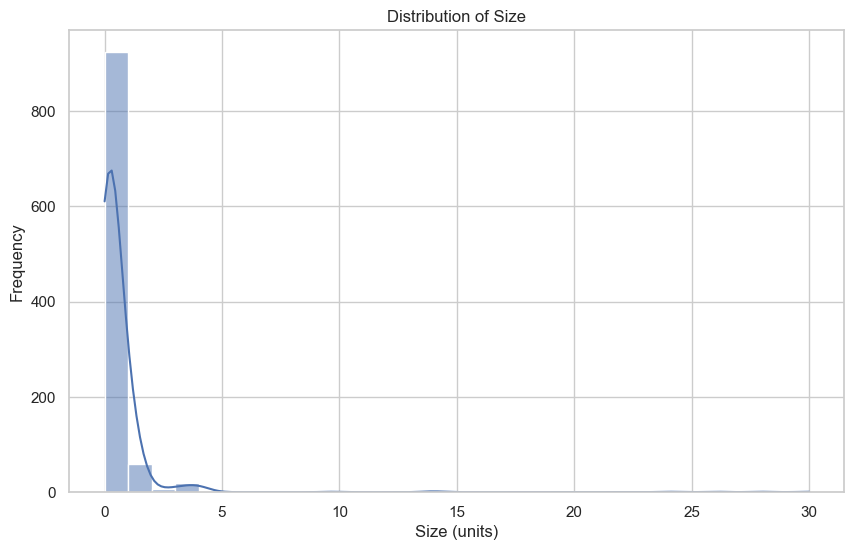

In [696]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.histplot(mergedDF['size'].dropna(), kde=True, bins=30)  # KDE adds a density curve
plt.title('Distribution of Size')
plt.xlabel('Size (units)')
plt.ylabel('Frequency')

plt.show()

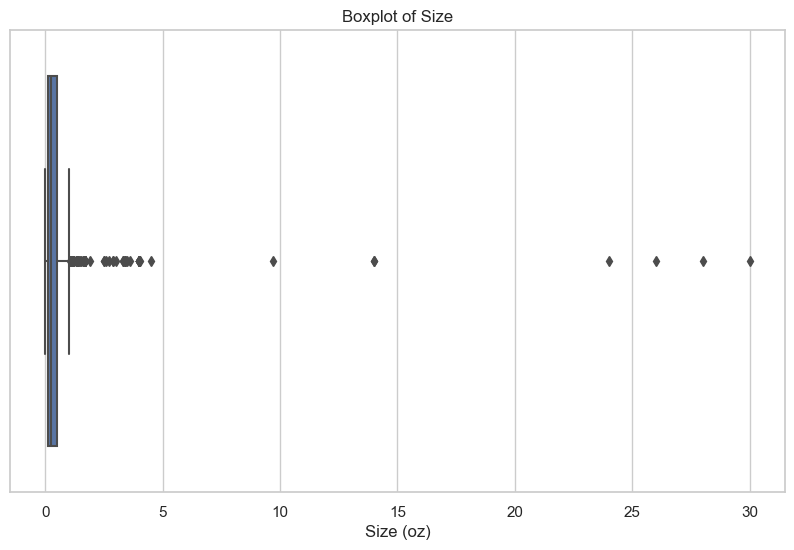

In [697]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=mergedDF['size'])
plt.title('Boxplot of Size')
plt.xlabel('Size (oz)')
plt.show()

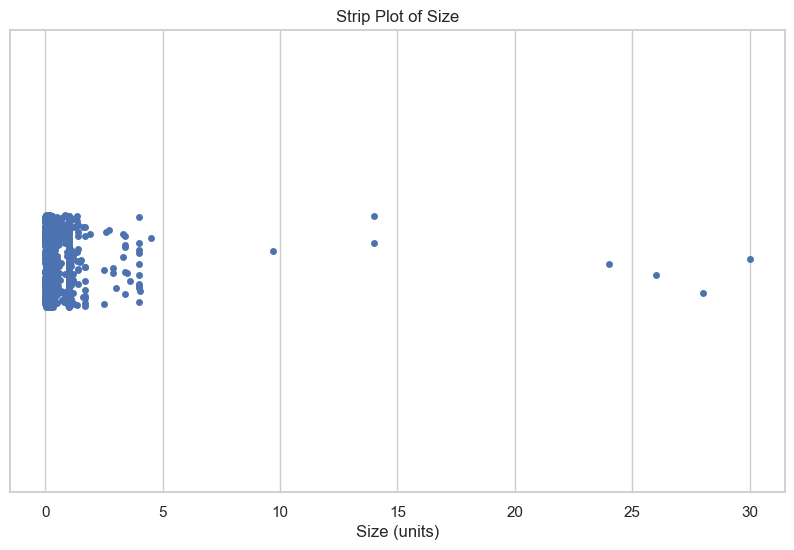

In [698]:
# Strip Plot
plt.figure(figsize=(10, 6))
sns.stripplot(x=mergedDF['size'])
plt.title('Strip Plot of Size')
plt.xlabel('Size (units)')
plt.show()

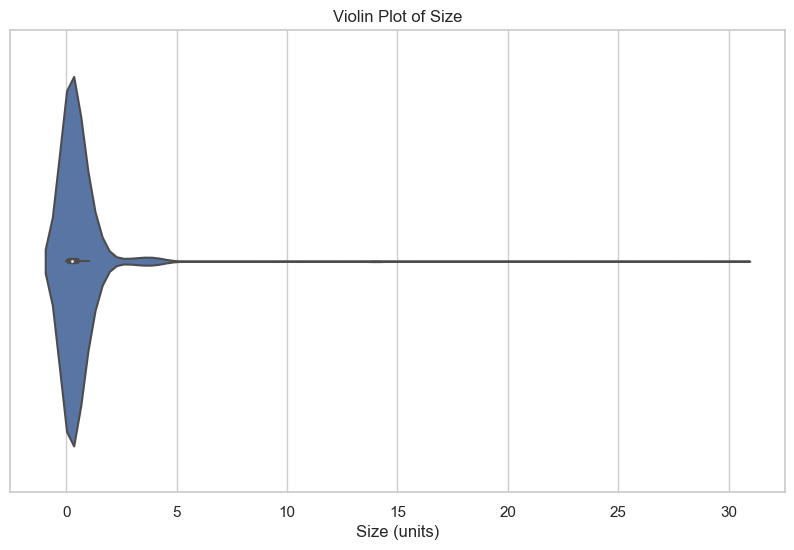

In [699]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=mergedDF['size'])
plt.title('Violin Plot of Size')
plt.xlabel('Size (units)')
plt.show()

In [700]:
print(mergedDF.isna().sum())

is_clean                    0
product_id                  0
product_name                0
brand_name                  0
size                      179
loves_count                 0
number_of_reviews           0
rating                      0
primary_category            0
secondary_category          0
tertiary_category           0
variation_type              0
ingredients                 0
ingredient_description      0
limited_edition             0
online_only                 0
sephora_exclusive           0
list_price                  0
dtype: int64


In [701]:
print("\nSummary statistics:")
print(mergedDF['size'].describe(include='all'))
median_size = mergedDF['size'].median()
print(median_size)


Summary statistics:
count    1018.000000
mean        0.590061
std         1.904658
min         0.000800
25%         0.120000
50%         0.240000
75%         0.487500
max        30.000000
Name: size, dtype: float64
0.24


## Replacing the missing values with the median

In [702]:
mergedDF['size'].fillna(median_size, inplace=True)

missing_values = mergedDF.isna().sum()
print(mergedDF.shape)
print(missing_values)

(1197, 18)
is_clean                  0
product_id                0
product_name              0
brand_name                0
size                      0
loves_count               0
number_of_reviews         0
rating                    0
primary_category          0
secondary_category        0
tertiary_category         0
variation_type            0
ingredients               0
ingredient_description    0
limited_edition           0
online_only               0
sephora_exclusive         0
list_price                0
dtype: int64


All the missings values have been taken care of.

## Evaluating Each Column

### is_clean

In [703]:
print(mergedDF['is_clean'].dtypes)

category


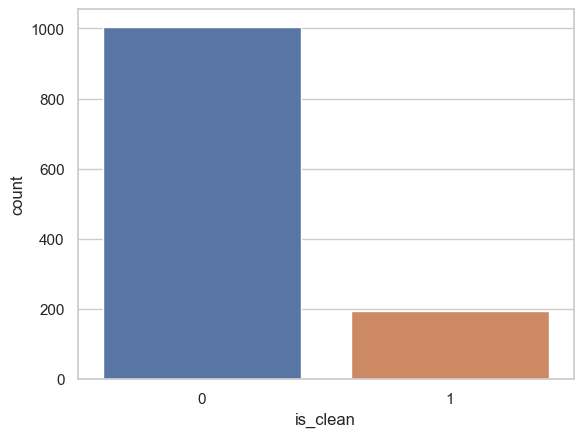

In [704]:
sns.countplot(x="is_clean",data=mergedDF)
plt.show()

Looks Clean to me! Maybe smaller ample of clean products than I hoped

### product_ID and product_name

These columns seem redundant. I think Id rather keep the Product name as it will most likely better inform cleaning other columns

In [705]:
mergedDF = mergedDF.drop('product_id',axis =1)

In [706]:
duplicate_names = mergedDF[mergedDF['product_name'].duplicated()]
print(duplicate_names)

## there sre no duplicates

     is_clean                      product_name          brand_name  size  \
714         0  Translucent Loose Setting Powder       Laura Mercier  1.00   
1175        0  Translucent Loose Setting Powder  SEPHORA COLLECTION  0.52   

      loves_count  number_of_reviews  rating primary_category  \
714        813497               9606  4.4981           Makeup   
1175        34635                145  4.4552           Makeup   

     secondary_category       tertiary_category variation_type  \
714                Face  Setting Spray & Powder          Color   
1175               Face  Setting Spray & Powder           Size   

                                            ingredients  \
714   ['Talc, Magnesium Myristate, Nylon-12, Capryli...   
1175  ['Talc, Calcium Aluminum Borosilicate, Nylon-1...   

                                 ingredient_description limited_edition  \
714   <p>TALC, MAGNESIUM MYRISTATE, NYLON-12, CAPRYL...               0   
1175  Mica, Glass Beads, Phaseolus Radiatus S

In [707]:
print(mergedDF['product_name'])

0                             Hydrating Lip Treatment Oil
1                       Skin-Enhancing Tinted Moisturizer
2        Lash-Amplifying Volumizing & Lengthening Mascara
3                Skin Melt Talc-Free Loose Setting Powder
4                         Light-Catching Highlighter Balm
5                                Skin-Enhancing Concealer
6                    Ultra-Flex Clear Eyebrow Shaping Gel
7                Desert Date Cream Blush & Lip Multistick
9           DIPBROW® Waterproof, Smudge Proof Brow Pomade
10                     Smudge-Proof Matte Liquid Lipstick
11                  Modern Renaissance Eye Shadow Palette
12                            Soft Glam Eyeshadow Palette
13                  Bronze & Highlight Powder Contour Kit
15               Sun Dipped Glow Kit® Powder Highlighters
16      Clear Brow Gel Flexible Medium-Hold Eyebrow Se...
17              Ombre Effect Long Wearing Brow Powder Duo
18      Brow Freeze® Extreme Hold Laminated-Look Sculp...
20            

I think I will leave this here for now. Potentially I may look at adding a category for trademarked product

### Brand Name

In [708]:
print(mergedDF['brand_name'])

0                          Ami Colé
1                          Ami Colé
2                          Ami Colé
3                          Ami Colé
4                          Ami Colé
5                          Ami Colé
6                          Ami Colé
7                          Ami Colé
9           Anastasia Beverly Hills
10          Anastasia Beverly Hills
11          Anastasia Beverly Hills
12          Anastasia Beverly Hills
13          Anastasia Beverly Hills
15          Anastasia Beverly Hills
16          Anastasia Beverly Hills
17          Anastasia Beverly Hills
18          Anastasia Beverly Hills
20          Anastasia Beverly Hills
21          Anastasia Beverly Hills
23          Anastasia Beverly Hills
24          Anastasia Beverly Hills
25          Anastasia Beverly Hills
26          Anastasia Beverly Hills
27          Anastasia Beverly Hills
28          Anastasia Beverly Hills
29          Anastasia Beverly Hills
30          Anastasia Beverly Hills
32          Anastasia Beverl

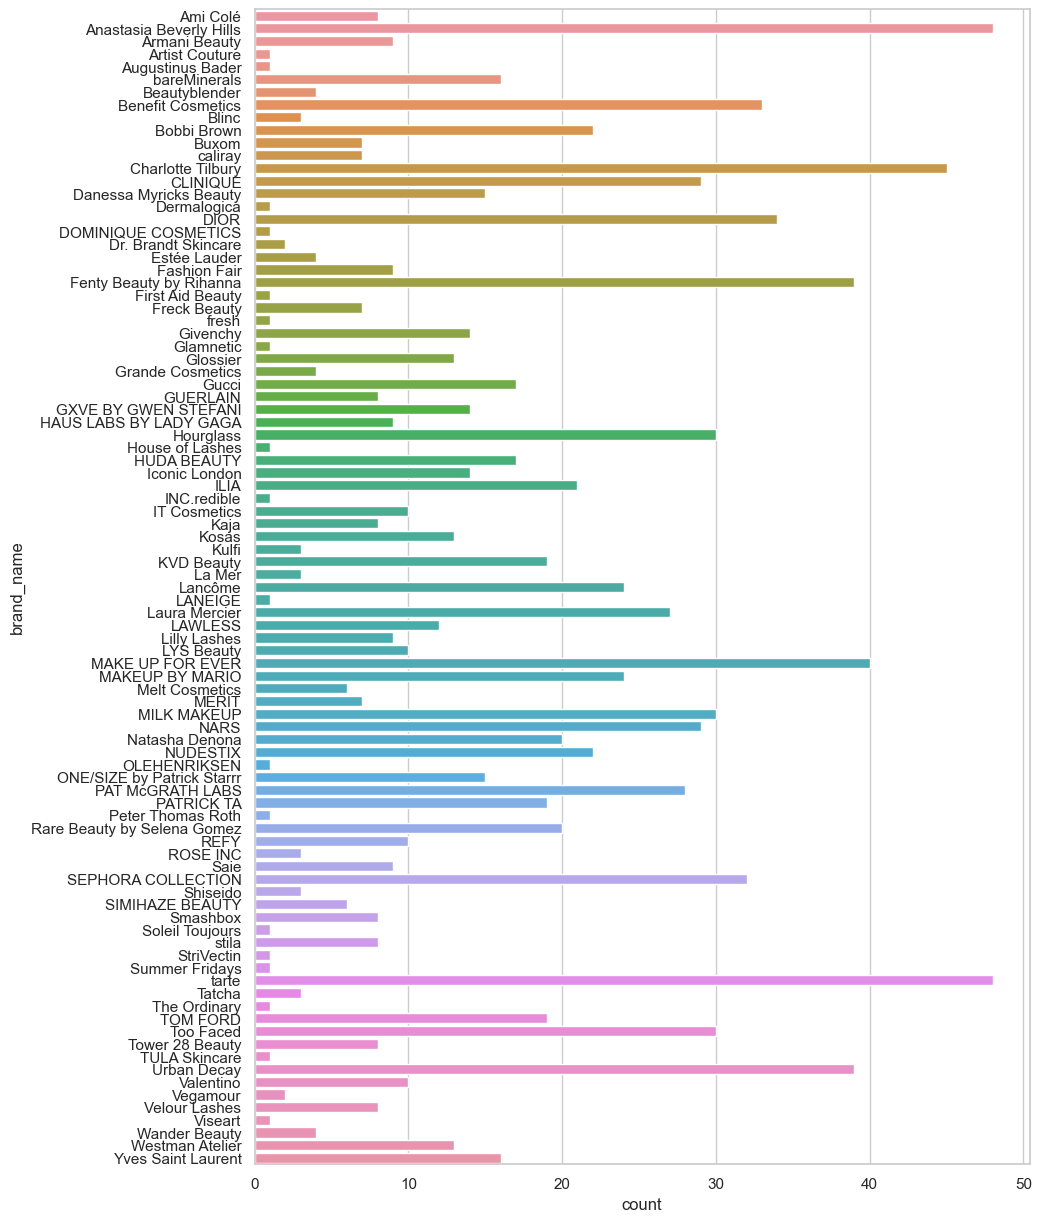

In [709]:
plt.figure(figsize=(10, 15))
sns.countplot(y="brand_name",data=mergedDF)
plt.show()

Doesnt look like there are any incorrect values or irregular names

### loves_count 

In [710]:
print(mergedDF['loves_count'].dtypes)

int64


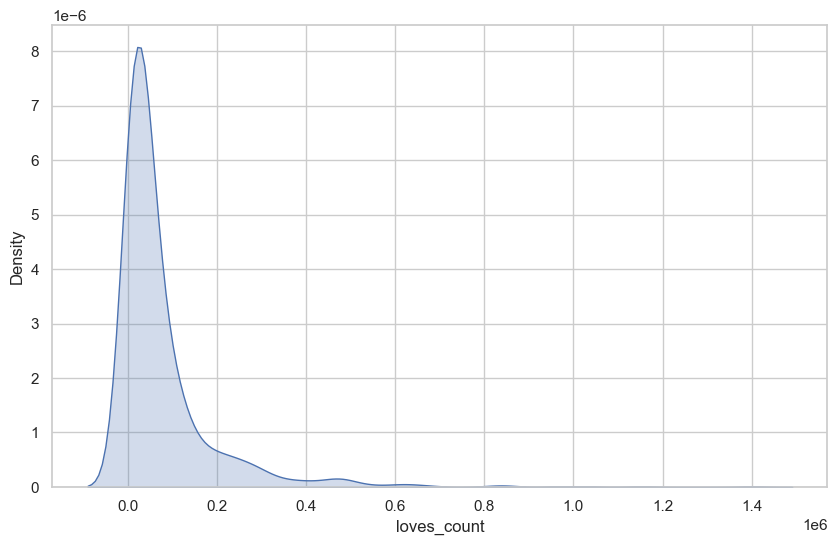

              size   loves_count  number_of_reviews       rating   list_price
count  1197.000000  1.197000e+03        1197.000000  1197.000000  1197.000000
mean      0.537713  7.707557e+04        1140.859649     4.145669    34.201671
std       1.760788  1.237423e+05        1983.878815     0.403507    16.386247
min       0.000800  0.000000e+00           1.000000     1.903200     8.000000
25%       0.140000  1.387400e+04         191.000000     3.944800    24.000000
50%       0.240000  3.482500e+04         514.000000     4.226200    30.000000
75%       0.400000  8.457200e+04        1232.000000     4.434200    40.000000
max      30.000000  1.401068e+06       19366.000000     5.000000   205.000000


In [711]:
plt.figure(figsize=(10, 6))  
sns.kdeplot(data=mergedDF['loves_count'], fill=True)  
plt.show()
print(mergedDF.describe())

I dont think that there are really any ouliers, I nelive some products are just WAY more popular

### number_of_reviews

number of reviews and likes may be closely related

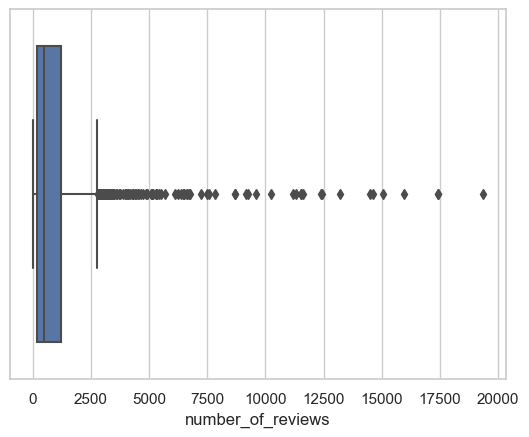

In [712]:
plot3=sns.boxplot(x="number_of_reviews",data=mergedDF)
plt.show()

 Again, I dont think there are any obvious outliers? but I will look closr out the outliers

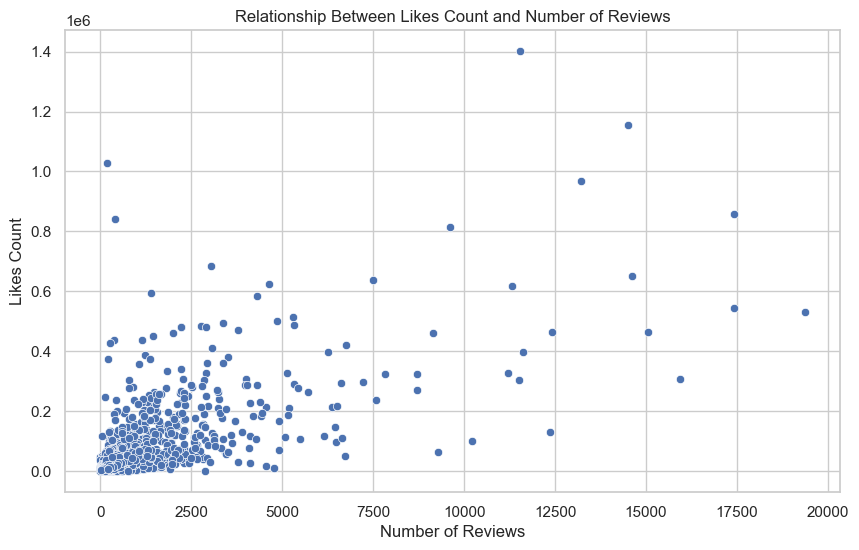

In [713]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.scatterplot(x='number_of_reviews', y='loves_count', data=mergedDF)
plt.title('Relationship Between Likes Count and Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Likes Count')
plt.show()

In [714]:
max_loves_row = mergedDF[mergedDF['loves_count'] == mergedDF['loves_count'].max()]
print(max_loves_row[['product_name','loves_count',  'number_of_reviews',  'rating']])

max_reviews_row = mergedDF[mergedDF['number_of_reviews'] == mergedDF['number_of_reviews'].max()]
print(max_reviews_row[['product_name','loves_count',  'number_of_reviews',  'rating']])

                 product_name  loves_count  number_of_reviews  rating
1074  Soft Pinch Liquid Blush      1401068              11529  4.5442
                                          product_name  loves_count  \
1323  Better Than Sex Volumizing & Lengthening Mascara       532085   

      number_of_reviews  rating  
1323              19366  3.7241  


From Industry knowledge I know both of these products are INCREDIBLY popular

### rating

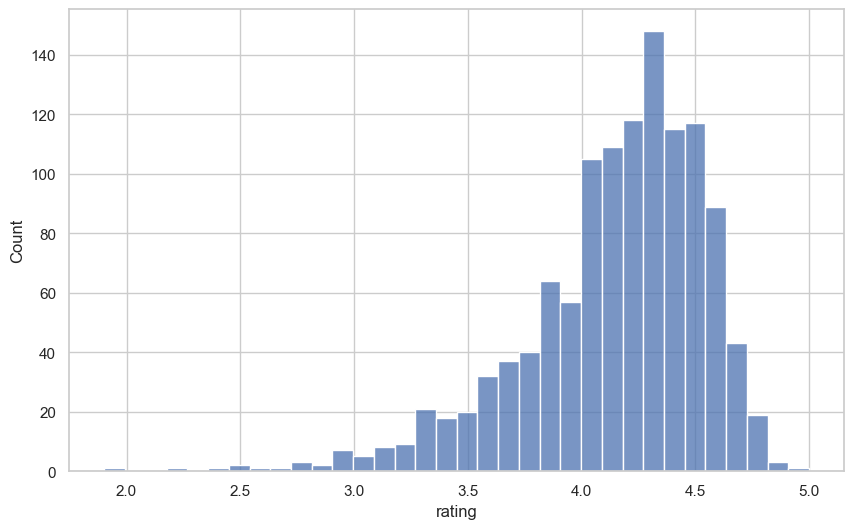

In [715]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.histplot(data=mergedDF['rating'], fill=True)  # Example column: 'price'
plt.show()

I dont beieve there are any errors here, but I will chec k it with the loves count to see if theres any abnormalcies 

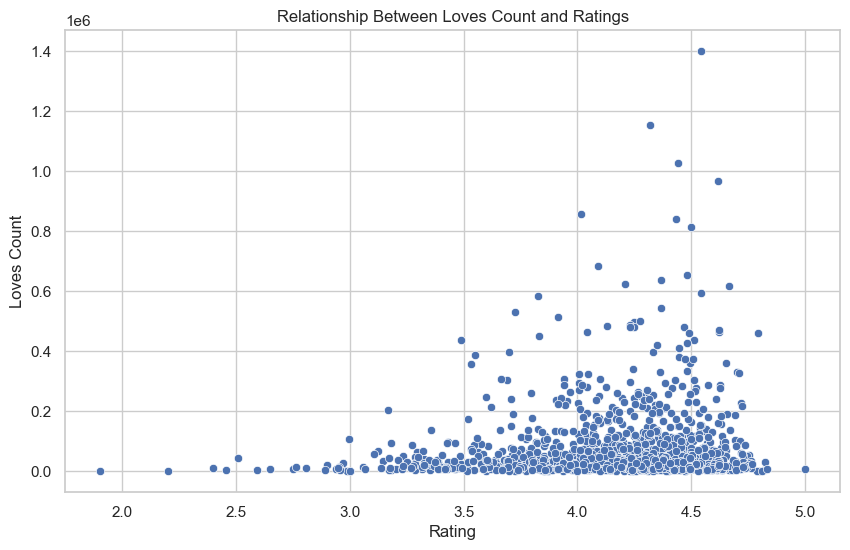

In [716]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.scatterplot(x='rating', y='loves_count', data=mergedDF)
plt.title('Relationship Between Loves Count and Ratings')
plt.xlabel('Rating')
plt.ylabel('Loves Count')
plt.show()

I think ti makes sense that there are no occurances where an item with a high loves count has a low rating, these results seem cosistent 

### primary_category, secondary_category, and tertiary_category

I think I should drop the primaery category since they should all be makeup b ut ill check it irst

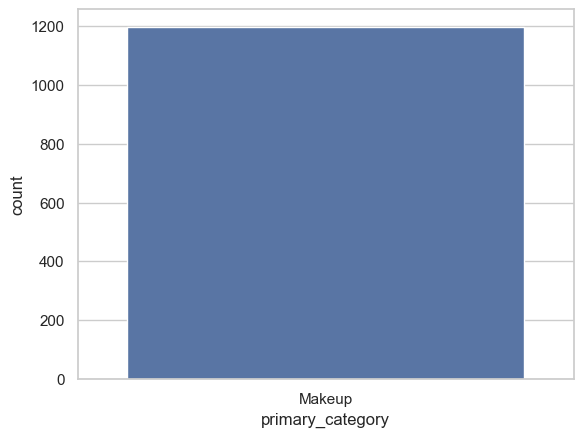

In [717]:
sns.countplot(x="primary_category",data=mergedDF)
plt.show()


mergedDF = mergedDF.drop('primary_category',axis =1)

 Yeah I just dropped the primary category

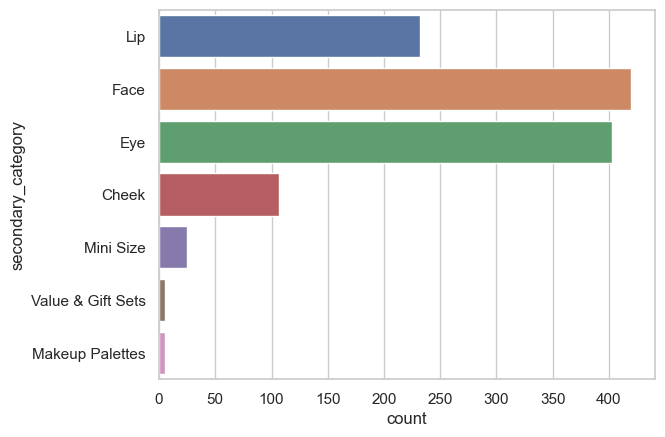

In [718]:
sns.countplot(y="secondary_category",data=mergedDF)
plt.show()

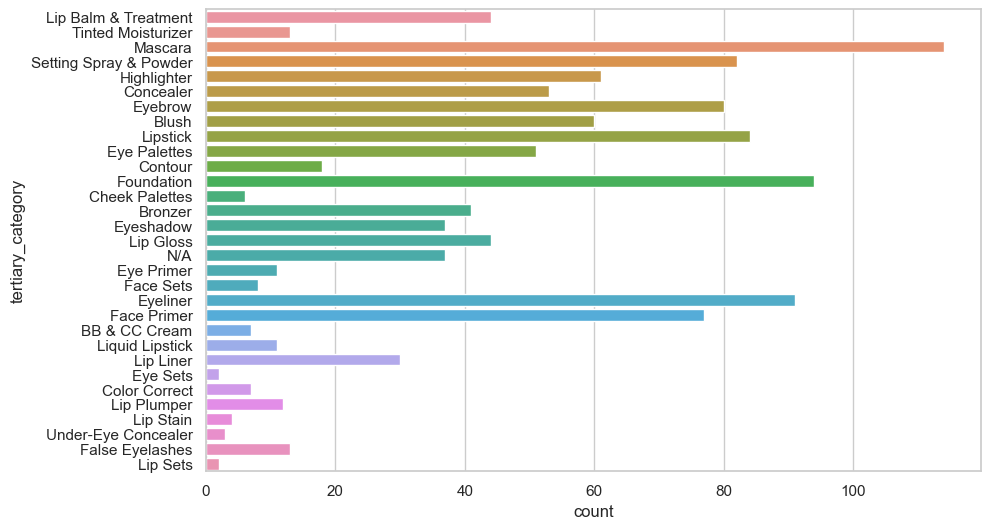

In [719]:
plt.figure(figsize=(10, 6))
sns.countplot(y="tertiary_category",data=mergedDF)
plt.show()

In [720]:
na_rows = mergedDF[mergedDF['tertiary_category'] == 'N/A']
print(na_rows['product_name'])

49                  Mini Dewy Set Hydrating Setting Spray
59                          Rose Metals Eyeshadow Palette
68                  Mini Translucent Loose Setting Powder
80      Mini Eyes To Kill Volumizing and Lengthening M...
148     Gimme Brow Goals Volumizing Brow Gel & Pencil Duo
195                 Mini Pillow Talk Lipstick & Liner Set
201          Mini Airbrush Flawless Finish Setting Powder
203                  Mini Airbrush Flawless Setting Spray
209               Mini Filmstar Bronze & Glow Contour Duo
300                           BACKSTAGE Glow Face Palette
336                      The Essential Eye Shadow Palette
375        Mini Pro Filt’r Instant Retouch Setting Powder
410     The Navy Collection: 5-Piece Lip, Eye + Access...
522                       Mini Vanish™ Airbrush Concealer
561          Mini Easy Bake Loose Baking & Setting Powder
610                       Mini Fullest Volumizing Mascara
619     Mini Bye Bye Under Eye Full Coverage Anti-Agin...
662     Shade 

In [721]:
for index, row in na_rows.iterrows():
    # Example: update row with a new value
    mergedDF.at[49, 'tertiary_category'] = 'Setting Spray & Powder'
    mergedDF.at[59, 'tertiary_category'] = 'Eye Palletes'
    mergedDF.at[68, 'tertiary_category'] = 'Setting Spray & Powder'
    mergedDF.at[80, 'tertiary_category'] = 'Mascara'
    mergedDF.at[148, 'tertiary_category'] = 'Eyebrow'
    mergedDF.at[195, 'tertiary_category'] = 'Lip Sets'
    mergedDF.at[201, 'tertiary_category'] = 'Setting Spray & Powder'
    mergedDF.at[203, 'tertiary_category'] = 'Setting Spray & Powder'
    mergedDF.at[209, 'tertiary_category'] = 'Cheek Palettes'
    mergedDF.at[300, 'tertiary_category'] = 'Cheek Palettes'
    mergedDF.at[336, 'tertiary_category'] = 'Eye Palletes'
    mergedDF.at[375, 'tertiary_category'] = 'Setting Spray & Powder'
    mergedDF.at[410, 'tertiary_category'] = 'Lip Sets'
    mergedDF.at[522, 'tertiary_category'] = 'Concealer'
    mergedDF.at[561, 'tertiary_category'] = 'Setting Spray & Powder'
    mergedDF.at[610, 'tertiary_category'] = 'Mascara'
    mergedDF.at[619, 'tertiary_category'] = 'Concealer'
    mergedDF.at[662, 'tertiary_category'] = 'Cheek Palettes'
    mergedDF.at[682, 'tertiary_category'] = 'Lip Gloss'
    mergedDF.at[806, 'tertiary_category'] = 'Face Primer'
    mergedDF.at[811, 'tertiary_category'] = 'Face Primer'
    mergedDF.at[814, 'tertiary_category'] = 'Face Primer'
    mergedDF.at[827, 'tertiary_category'] = 'Setting Spray & Powder'
    mergedDF.at[881, 'tertiary_category'] = 'Setting Spray & Powder'
    mergedDF.at[886, 'tertiary_category'] = 'Setting Spray & Powder'
    mergedDF.at[932, 'tertiary_category'] = 'Bronzer'
    mergedDF.at[955, 'tertiary_category'] = 'Eye Palettes'
    mergedDF.at[972, 'tertiary_category'] = 'Cheek Palettes'
    mergedDF.at[1001, 'tertiary_category'] = 'Setting Spray & Powder'
    mergedDF.at[1006, 'tertiary_category'] = 'Setting Spray & Powder'
    mergedDF.at[1229, 'tertiary_category'] = 'Cheek Palettes'
    mergedDF.at[1265, 'tertiary_category'] = 'Cheek Palettes'
    mergedDF.at[1280, 'tertiary_category'] = 'Tinted Moisturizer'
    mergedDF.at[1340, 'tertiary_category'] = 'Lip Gloss'



In [722]:
na_rows = mergedDF[mergedDF['tertiary_category'] == 'N/A']
print(na_rows['product_name'])

768                              Click Magnetic Value Set
828     Mini Gentle Eye Gel Waterproof Eye & Lip Makeu...
1428                                   24hr Lash Care Kit
Name: product_name, dtype: object


In [723]:
mergedDF = mergedDF.drop([768,1428,828])

na_rows = mergedDF[mergedDF['tertiary_category'] == 'N/A']
print(na_rows['product_name'])

Series([], Name: product_name, dtype: object)


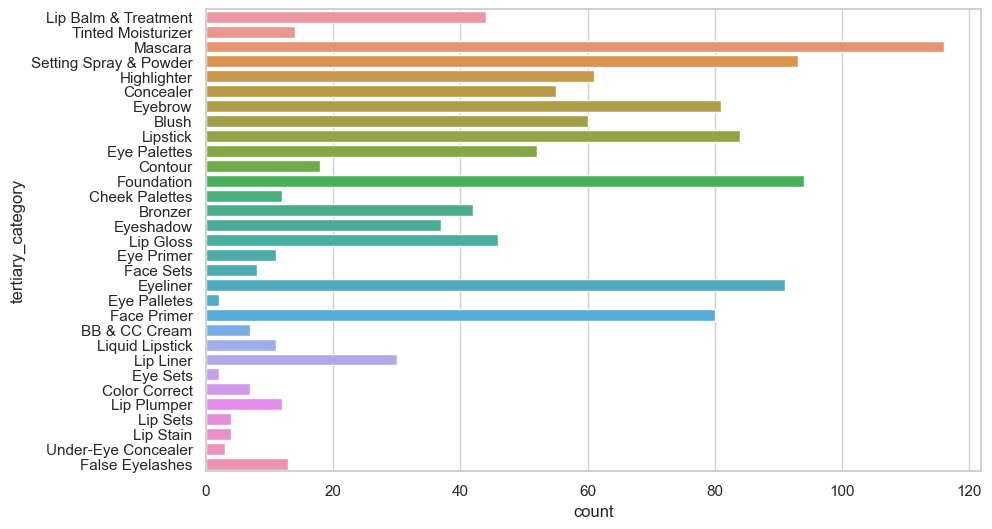

In [724]:
plt.figure(figsize=(10, 6))
sns.countplot(y="tertiary_category",data=mergedDF)
plt.show()

In [725]:
c

NameError: name 'c' is not defined

### variation type

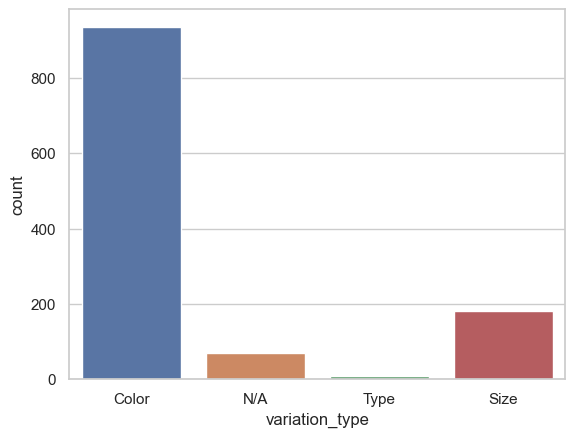

In [726]:
sns.countplot(x="variation_type",data=mergedDF)
plt.show()


In [727]:
na_rows = mergedDF[mergedDF['variation_type'] == 'N/A']
print(na_rows)

     is_clean                                       product_name  \
11          0              Modern Renaissance Eye Shadow Palette   
12          0                        Soft Glam Eyeshadow Palette   
34          0               Mini Soft Glam II Eye Shadow Palette   
50          0                          Nouveau Eyeshadow Palette   
59          0                      Rose Metals Eyeshadow Palette   
60          0      Primrose All In One Face & Eye Shadow Palette   
78          0                    Eyes To Kill Waterproof Mascara   
227         0                 Super Nudes Easy Eyeshadow Palette   
256         0                               Lash Building Primer   
271         0  Redness Solutions Instant Relief Mineral Press...   
332         0                   Diorshow Pump 'N' Volume Mascara   
336         0                   The Essential Eye Shadow Palette   
410         0  The Navy Collection: 5-Piece Lip, Eye + Access...   
411         0                              Ultra

In [728]:
mergedDF = mergedDF.drop(['variation_type'],axis = 1)
print(mergedDF.columns)

Index(['is_clean', 'product_name', 'brand_name', 'size', 'loves_count',
       'number_of_reviews', 'rating', 'secondary_category',
       'tertiary_category', 'ingredients', 'ingredient_description',
       'limited_edition', 'online_only', 'sephora_exclusive', 'list_price'],
      dtype='object')


Ingredients

In [729]:
# Clean 'Ingredient Description' column
print(mergedDF['ingredients'].head())

mergedDF['ingredients'] = mergedDF['ingredients'].str.strip()

# Convert to lowercase for consistency

mergedDF['ingredients'] = mergedDF['ingredients'].str.lower()
import re

def clean_ingredients(ingredients):
    # Remove extra characters and wter adjustment
    ingredients = ingredients.replace('water/aqua/eau', 'water')
    ingredients = re.sub(r'[^\w\s,;]', '', ingredients)
    ingredients = re.sub(r'\s+', ' ', ingredients)
    ingredients = ingredients.lower()
    ingredients = ingredients.replace('aqua water', 'water')
    ingredients = ingredients.replace('water aqua', 'water')
    ingredients = ingredients.replace('wateraqua', 'water')
    
    ingredient_list = [i.strip() for i in re.split(r'[;,]', ingredients) if i.strip()]
    
    return ', '.join(ingredient_list)

# Apply the cleaning function to the 'ingredients' column
mergedDF['ingredients'] = mergedDF['ingredients'].apply(clean_ingredients)

print(mergedDF['ingredients'].head())


0    ['Triisostearoyl Polyglyceryl-3 Dimer Dilinole...
1    ['Water/Aqua/Eau, Isohexadecane, Dimethicone, ...
2    ['Water/Aqua/Eau, Synthetic Beeswax, Glyceryl ...
3    ['Synthetic Fluorphlogopite, Silica, Lauroyl L...
4    ['Diisostearyl Malate, Octyldodecanol, Octyldo...
Name: ingredients, dtype: object
0    triisostearoyl polyglyceryl3 dimer dilinoleate...
1    water, isohexadecane, dimethicone, isopropyl i...
2    water, synthetic beeswax, glyceryl stearate, j...
3    synthetic fluorphlogopite, silica, lauroyl lys...
4    diisostearyl malate, octyldodecanol, octyldode...
Name: ingredients, dtype: object


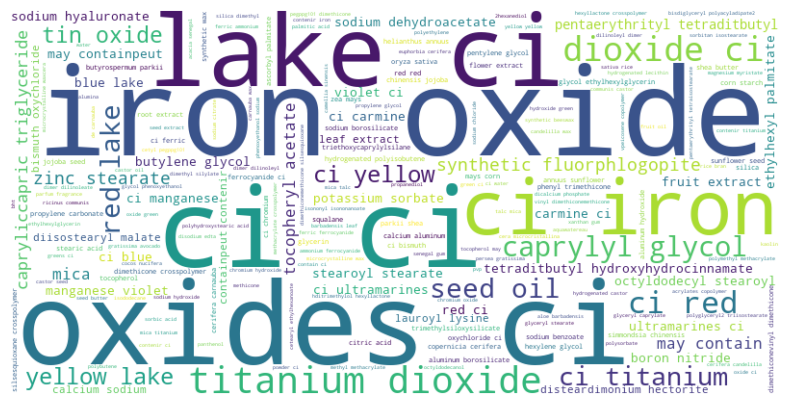

In [730]:
from wordcloud import WordCloud

text = ' '.join(mergedDF['ingredients'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [731]:
print(mergedDF['ingredient_description'].head())

df = mergedDF



df['ingredient_description'] = df['ingredient_description'].str.strip()
df['ingredient_description'] = df['ingredient_description'].str.replace(':', '', regex=True)
df['ingredient_description'] = df['ingredient_description'].str.replace('-', '', regex=True)
df['ingredient_description'] = df['ingredient_description'].str.replace('<br>', ',', regex=True)
df['ingredient_description'] = df['ingredient_description'].str.replace('.', '', regex=True)
df['ingredient_description'] = df['ingredient_description'].str.replace('</b>', ',', regex=True)
df['ingredient_description'] = df['ingredient_description'].str.replace('<b>', ',', regex=True)
df['ingredient_description'] = df['ingredient_description'].str.replace('<stong>', ',', regex=True)
df['ingredient_description'] = df['ingredient_description'].str.replace('<p>', ',', regex=True)
df['ingredient_description'] = df['ingredient_description'].str.replace('</stong>', '', regex=True)
df['ingredient_description'] = df['ingredient_description'].str.replace('</p>', '', regex=True)
df['ingredient_description'] = df['ingredient_description'].str.replace('<\n\>', '', regex=True)
df['ingredient_description'] = df['ingredient_description'].str.replace('<\r\>', '', regex=True)
df['ingredient_description'] = df['ingredient_description'].str.replace('<\r\n>', '', regex=True)



pd.set_option('display.max_rows', None) 
pd.set_option('display.width')  
print(df['ingredient_description'])

0    -Baobab Seed Oil: Moisturizes and nourishes li...
1    -Baobab Seed Extract: Hydrates skin.<br>-Hibis...
2    -Shea Butter: Softens and conditions lashes.<b...
3    -Hyaluronic Acid: Retains moisture and visibly...
4    -Baobab Seed Oil: Hydrates and nourishes skin....
Name: ingredient_description, dtype: object


ValueError: Must provide an even number of non-keyword arguments

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['ingredient_description'].dropna().str.len(), bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Ingredient Description Lengths')
plt.xlabel('Length of Ingredient Description (characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


print(df['ingredient_description'].head())

In [ ]:
print(df.columns)

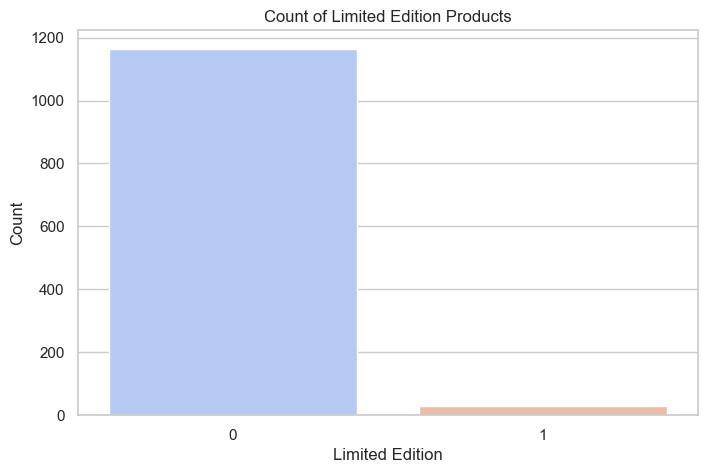

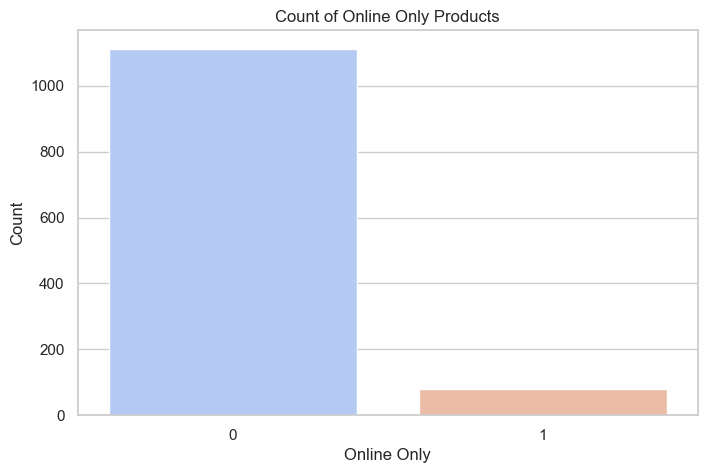

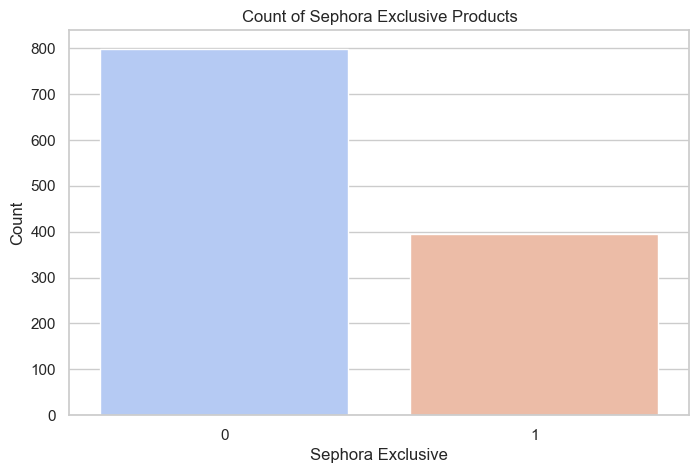

In [732]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

# Count plot for 'limited_edition'
plt.figure(figsize=(8, 5))
sns.countplot(x='limited_edition', data=df, palette='coolwarm')
plt.title('Count of Limited Edition Products')
plt.xlabel('Limited Edition')
plt.ylabel('Count')
plt.show()

# Count plot for 'online_only'
plt.figure(figsize=(8, 5))
sns.countplot(x='online_only', data=df, palette='coolwarm')
plt.title('Count of Online Only Products')
plt.xlabel('Online Only')
plt.ylabel('Count')
plt.show()

# Count plot for 'sephora_exclusive'
plt.figure(figsize=(8, 5))
sns.countplot(x='sephora_exclusive', data=df, palette='coolwarm')
plt.title('Count of Sephora Exclusive Products')
plt.xlabel('Sephora Exclusive')
plt.ylabel('Count')
plt.show()


### List price

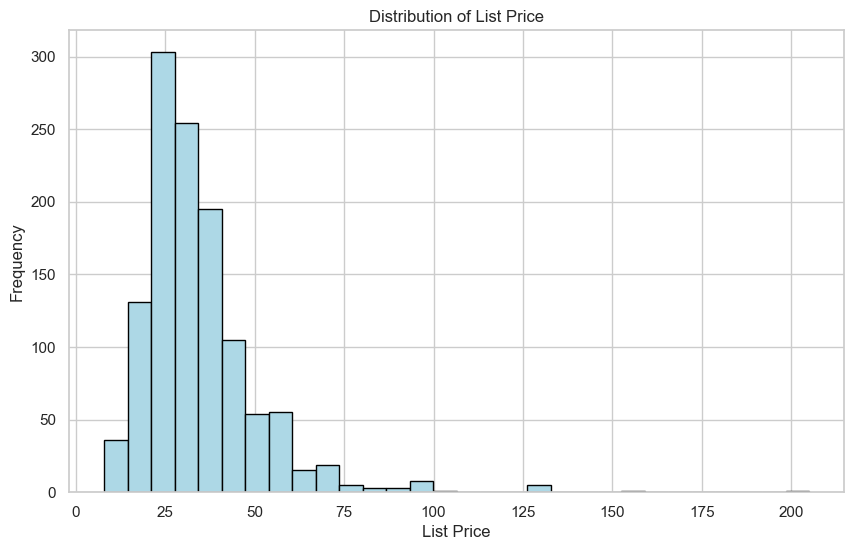

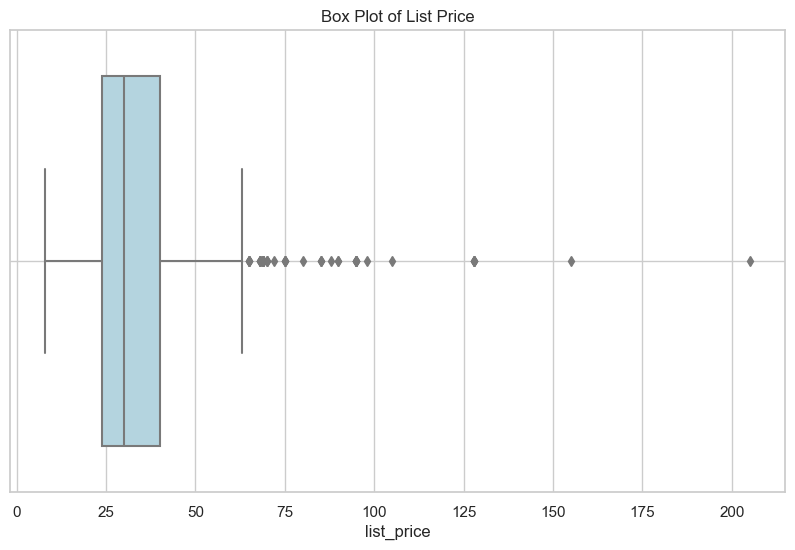

Lower Bound: -18.0
Upper Bound: 110.0
Outliers in List Price:
      list_price                                       product_name  \
82         155.0                 The Eyebrow & Lash Enhancing Serum   
1022       128.0  Mothership V Eyeshadow Palette - Bronze Seduction   
1028       128.0  Mothership VII Eyeshadow Palette - Divine Rose...   
1030       128.0        Mothership I Eyeshadow Palette - Subliminal   
1032       128.0   Mothership IX Eyeshadow Palette: Huetopian Dream   
1037       128.0  Mothership X Eyeshadow Palette:  Moonlit Seduc...   
1416       205.0        Go-Clutch Refillable Radiant Setting Powder   

            brand_name  
82    Augustinus Bader  
1022  PAT McGRATH LABS  
1028  PAT McGRATH LABS  
1030  PAT McGRATH LABS  
1032  PAT McGRATH LABS  
1037  PAT McGRATH LABS  
1416         Valentino  


In [733]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['list_price'].dropna(), bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of List Price')
plt.xlabel('List Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['list_price'], color='lightblue')
plt.title('Box Plot of List Price')
plt.grid(True)
plt.show()

# IQR method


Q1 = df['list_price'].quantile(0.5)
Q3 = df['list_price'].quantile(0.95)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')

outliers = df[(df['list_price'] < lower_bound) | (df['list_price'] > upper_bound)]

# Display the outliers
print("Outliers in List Price:")
print(outliers[['list_price','product_name','brand_name']])


In [734]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
print(df.head())  # Display the first 5 rows

  is_clean                                      product_name brand_name  size  \
0        1                       Hydrating Lip Treatment Oil   Ami Colé  0.15   
1        1                 Skin-Enhancing Tinted Moisturizer   Ami Colé  1.00   
2        1  Lash-Amplifying Volumizing & Lengthening Mascara   Ami Colé  0.30   
3        1          Skin Melt Talc-Free Loose Setting Powder   Ami Colé  0.29   
4        1                   Light-Catching Highlighter Balm   Ami Colé  0.14   

   loves_count  number_of_reviews  rating secondary_category  \
0        22871                397  4.3401                Lip   
1         6596                240  4.6792               Face   
2         5015                232  4.4310                Eye   
3         4978                103  4.6117               Face   
4         3685                 19  4.0526               Face   

        tertiary_category                                        ingredients  \
0    Lip Balm & Treatment  triisostearoyl polygl